In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from tqdm import tqdm
tqdm.pandas()

In [3]:
news_data = pd.read_csv("data.csv")

In [4]:
news_data.head(10)

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
5,1582,howard truanted to play snooker conservative...,politics
6,651,wales silent on grand slam talk rhys williams ...,sport
7,1797,french honour for director parker british film...,entertainment
8,2034,car giant hit by mercedes slump a slump in pro...,business
9,1866,fockers fuel festive film chart comedy meet th...,entertainment


In [5]:
news_data.drop(columns=["ArticleId"], inplace=True)

In [6]:
news_data.head()

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business


In [7]:
y = news_data.Category

In [8]:
y.value_counts()

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

In [9]:
import re
from bs4 import BeautifulSoup
import string
import wordninja as wn
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import nltk 

nltk.download('stopwords') 

from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')

def preprocessing(sentence):
    # Convert to smallercase
    sentence = sentence.lower()

    # discard punctutation
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))

    # discard non-alphabetic characters
    sentence = re.sub(r'[^a-zA-Z ]', '', sentence)

    # discard emails
    sentence = re.sub(r"([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", '', sentence)

    # discard mentions
    sentence = re.sub(r"@[A-Za-z0-9]+","", sentence)

    # discard html
    sentence = BeautifulSoup(sentence, 'lxml').get_text().strip()

    # discard URL
    sentence = re.sub(r'https?://\S+|www\.\S+', '', sentence)

    # Specific Utternances
    sentence = re.sub(r"wont", "will not", sentence)
    sentence = re.sub(r"wouldnt", "would not", sentence)
    sentence = re.sub(r"shouldnt", "should not", sentence)
    sentence = re.sub(r"couldnt", "could not", sentence)
    sentence = re.sub(r"cudnt", "could not", sentence)
    sentence = re.sub(r"cant", "can not", sentence)
    sentence = re.sub(r"dont", "do not", sentence)
    sentence = re.sub(r"doesnt", "does not", sentence)
    sentence = re.sub(r"didnt", "did not", sentence)
    sentence = re.sub(r"wasnt", "was not", sentence)
    sentence = re.sub(r"werent", "were not", sentence)
    sentence = re.sub(r"havent", "have not", sentence)
    sentence = re.sub(r"hadnt", "had not", sentence)

    ## general
    sentence = re.sub(r"n\ t", " not", sentence)
    sentence = re.sub(r"\ s ", " is ", sentence) 
    sentence = re.sub(r"\ d ", " would ", sentence)
    sentence = re.sub(r"\ ll ", " will ", sentence)
    sentence = re.sub(r"\dunno", "do not ", sentence)
    sentence = re.sub(r"ive ", "i have ", sentence)
    sentence = re.sub(r"im ", "i am ", sentence)
    sentence = re.sub(r"i m ", "i am ", sentence)
    sentence = re.sub(r" w ", " with ", sentence)
    
    # Punctuation Removal
    sentence = "".join(i for i in sentence if i not in string.punctuation)
    
    # Stop Word Removal
    sentence = " ".join(i for i in sentence.split() if i not in stopwords_en)


    # Lemmatize
    lm = WordNetLemmatizer()
    snt = ' '.join([lm.lemmatize(i) for i in sentence.split()])
    return snt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\halarnak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
nltk.download('wordnet')
news_data["Tokens"] = news_data.Text.progress_apply(lambda x: preprocessing(x)) 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\halarnak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
100%|██████████| 1490/1490 [00:03<00:00, 399.90it/s]


In [11]:
news_data.head()

,Text,Category,Tokens
0,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launch defence lawyer defendin...
1,german business confidence slides german busin...,business,german business confidence slide german busine...
2,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizen majo...
3,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...
4,enron bosses in $168m payout eighteen former e...,business,enron boss payout eighteen former enron direct...


# Feature Engineering

As algorithms and machines lack the innate capability to comprehend characters, words, or sentences, we transform these linguistic elements into numerical representations.

There are two broad ways to do this
1. Bag of Words

This method considers whole text data and maps the words in sentence with their corresponding frequency. 

2. TF-IDF Model
This method valuates how relevant is a word to its sentence in a collection of sentences or documents.

Term frequency (TF): Number of times a term has appeared in a document. If a word appears in almost every document, it’s not significant for the classification.
Inverse Document Frequency (IDF): The inverse document frequency (IDF ) is a measure of how rare a word is in a document.
IDF of a word is = log(N/n)
N: total number of documents.
n: number of documents containing a term (word)



In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

TfIdf_Vectorizer = TfidfVectorizer(tokenizer = token.tokenize)

X = TfIdf_Vectorizer.fit_transform(news_data.Tokens)

X_array = X.toarray()

pd.DataFrame(data=X_array, columns = TfIdf_Vectorizer.get_feature_names_out()).head()

c:\Users\halarnak\AppData\Local\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,aa,aaa,aac,aadc,aaliyah,aaltra,aamir,aaron,aashare,ab,...,zombie,zone,zonealarm,zoom,zooropa,zorro,zuluaga,zurich,zutons,zvonareva
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
X_array.shape


(1490, 23436)

# Articles

In [14]:
article = """
NEW DELHI: England white-ball captain Jos Buttler defended the ECB's decision to withdraw its players from the IPL for national duty against Pakistan, emphasizing that international cricket should not clash with the world's biggest T20 league.
Buttler's absence will be significant for the Rajasthan Royals as they face the Royal Challengers Bengaluru in the IPL Eliminator on Wednesday.
Other England players missing the play-offs include Will Jacks, Reece Topley, and Phil Salt.
England will take on Pakistan in the first of four T20Is on Wednesday.
"""

# Detect Catagory

In [15]:
def detect_catagory(model, sentence):

    # make smallercase
    sentence = sentence.lower()
        
    # remove emails
    sentence = re.sub(r"([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", '', sentence)

    # remove mentions
    sentence = re.sub(r"@[A-Za-z0-9]+","", sentence)
    
    # Remove html
    sentence = BeautifulSoup(sentence, 'lxml').get_text().strip()
    
    # Remove URL
    sentence = re.sub(r'https?://\S+|www\.\S+', '', sentence)
        
    # Removing punctutation, string.punctuation in python consists of !"#$%&\'()*+,-./:;<=>?@[\\]^_
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    
    # Remove non-alphabetic characters
    sentence = re.sub(r'[^a-zA-Z ]', '', sentence)

    # Spliting words into two meaningful word
    sentence = ' '.join(wn.split(str(sentence)))

    # Correct the sentence
    sentence =  str(TextBlob(sentence).correct())
    
    # decontracted
    
    ## specific
    sentence = re.sub(r"wont", "will not", sentence)
    sentence = re.sub(r"wouldnt", "would not", sentence)
    sentence = re.sub(r"shouldnt", "should not", sentence)
    sentence = re.sub(r"couldnt", "could not", sentence)
    sentence = re.sub(r"cudnt", "could not", sentence)
    sentence = re.sub(r"cant", "can not", sentence)
    sentence = re.sub(r"dont", "do not", sentence)
    sentence = re.sub(r"doesnt", "does not", sentence)
    sentence = re.sub(r"didnt", "did not", sentence)
    sentence = re.sub(r"wasnt", "was not", sentence)
    sentence = re.sub(r"werent", "were not", sentence)
    sentence = re.sub(r"havent", "have not", sentence)
    sentence = re.sub(r"hadnt", "had not", sentence)

    ## general
    sentence = re.sub(r"n\ t", " not", sentence)
    #sentence = re.sub(r"\re", " are", sentence)
    sentence = re.sub(r"\ s ", " is ", sentence) 
    sentence = re.sub(r"\ d ", " would ", sentence)
    sentence = re.sub(r"\ ll ", " will ", sentence)
    sentence = re.sub(r"\dunno", "do not ", sentence)
    sentence = re.sub(r"ive ", "i have ", sentence)
    sentence = re.sub(r"im ", "i am ", sentence)
    sentence = re.sub(r"i m ", "i am ", sentence)
    sentence = re.sub(r" w ", " with ", sentence)


    # Lemmatize
    lm = WordNetLemmatizer()
    snt = ' '.join([lm.lemmatize(i) for i in sentence.split()])
    
    return model.predict(TfIdf_Vectorizer.transform([snt]))[0]

# Get Weight of a word

In [16]:
def get_weight(model, word):
    try:
        print(model.coef_[0][list(TfIdf_Vectorizer.get_feature_names_out()).index(word)])
    except IndexError:
        print(model.coef_.toarray()[0][list(TfIdf_Vectorizer.get_feature_names_out()).index(word)])
    except ValueError:
        pass

# Model Building

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=40)

## 1. Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

# Check Cross Validation Score

clf = LogisticRegression(random_state=42, max_iter=1000)
np.average(cross_val_score(clf, X, y, cv=10))

0.9691275167785234

In [20]:
# Model Building
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.96      0.99      0.98       107
entertainment       0.98      0.99      0.98        95
     politics       0.99      0.98      0.98        85
        sport       0.97      0.99      0.98       110
         tech       1.00      0.95      0.97        95

     accuracy                           0.98       492
    macro avg       0.98      0.98      0.98       492
 weighted avg       0.98      0.98      0.98       492



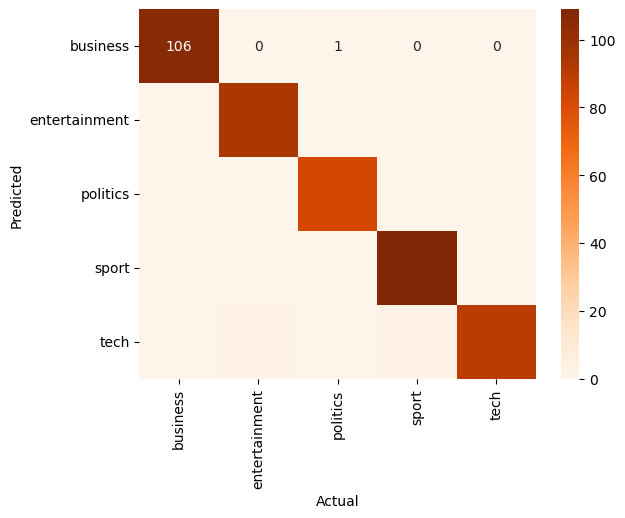

In [22]:
def plot_matrix(y_test, y_pred, color="Oranges"):
    labels = np.unique(y_pred)
    cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred), index=labels, columns=labels)
    sns.heatmap(cm_df, annot=True, fmt='g', cmap=color)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

plot_matrix(y_test, y_pred)

In [23]:
print(detect_catagory(clf, article))

sport


In [24]:
get_weight(clf, "play")

-0.5231218720931983


## Using L2 Regularizations

In [25]:
clf_l2 = LogisticRegression(penalty="l2", C=50, random_state=42, max_iter=1000)

np.average(cross_val_score(clf_l2, X, y, cv=10))

0.9738255033557047

In [26]:
clf_l2.fit(X_train, y_train)

LogisticRegression(C=50, max_iter=1000, random_state=42)

In [27]:
y_pred_l2 = clf_l2.predict(X_test)

print(classification_report(y_test, y_pred_l2))

               precision    recall  f1-score   support

     business       0.98      0.97      0.98       107
entertainment       0.98      0.99      0.98        95
     politics       0.98      0.98      0.98        85
        sport       0.98      0.99      0.99       110
         tech       0.98      0.97      0.97        95

     accuracy                           0.98       492
    macro avg       0.98      0.98      0.98       492
 weighted avg       0.98      0.98      0.98       492



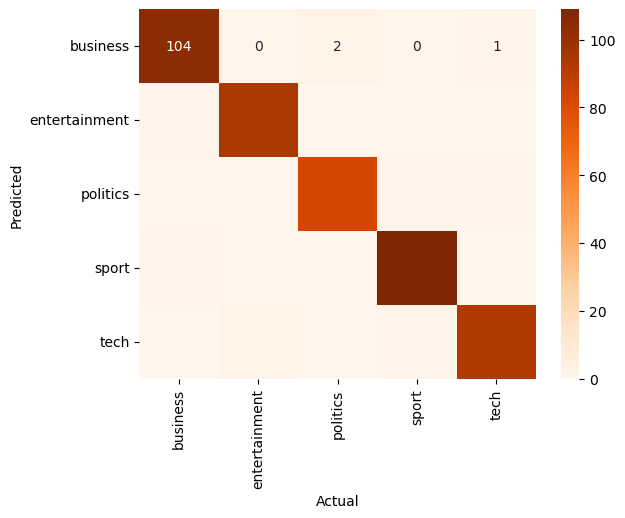

In [28]:
plot_matrix(y_test, y_pred_l2)

In [29]:
detect_catagory(clf_l2, article)

'sport'

In [30]:
detect_catagory(clf, article)

'sport'

## Using L1 Regularizations

In [31]:
clf_l1 = LogisticRegression(penalty="l1", C=20, random_state=42, max_iter=1000, solver='liblinear')

np.average(cross_val_score(clf_l1, X, y, cv=10))

0.959731543624161

In [32]:
clf_l1.fit(X_train, y_train)

LogisticRegression(C=20, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

In [33]:
y_pred_l1 = clf_l1.predict(X_test)
print(classification_report(y_test, y_pred_l1))

               precision    recall  f1-score   support

     business       0.92      0.95      0.94       107
entertainment       0.97      0.96      0.96        95
     politics       0.93      0.98      0.95        85
        sport       0.95      0.98      0.96       110
         tech       1.00      0.88      0.94        95

     accuracy                           0.95       492
    macro avg       0.95      0.95      0.95       492
 weighted avg       0.95      0.95      0.95       492



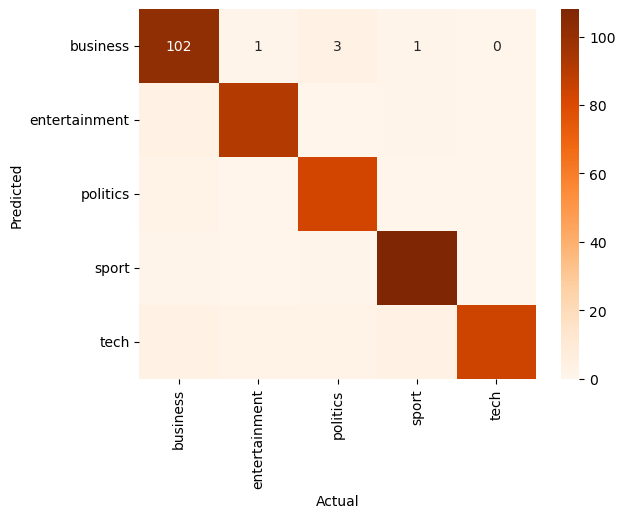

In [34]:
plot_matrix(y_test, y_pred_l1)

In [35]:
detect_catagory(clf_l1, article)

'sport'

In [36]:
detect_catagory(clf_l2, article)

'sport'

## 2. Support Vector Machine
### 1. Linear Kernal
The Linear Kernel is applied when data is linearly separable, requiring only a single line for distinction. It's especially favored in datasets with numerous features, such as Text Classification, where each alphabet constitutes a distinct feature, making the Linear Kernel particularly suitable.

In [37]:
from sklearn import svm

svc_linear = svm.SVC(kernel ='linear', C = 1)
svc_linear.fit(X_train, y_train)

y_pred = svc_linear.predict(X_test)

accuracy_score(y_pred, y_test)

0.9796747967479674

In [38]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.98      0.98      0.98       107
entertainment       0.98      0.99      0.98        95
     politics       0.97      0.98      0.97        85
        sport       0.98      0.99      0.99       110
         tech       0.99      0.96      0.97        95

     accuracy                           0.98       492
    macro avg       0.98      0.98      0.98       492
 weighted avg       0.98      0.98      0.98       492



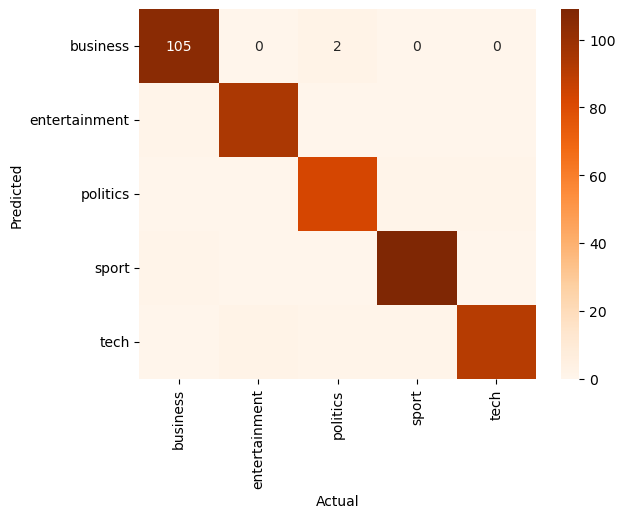

In [39]:
plot_matrix(y_test, y_pred)

# 3. Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier(max_depth=10, random_state=18)

rfc1.fit(X_train, y_train)
y_predicted = rfc1.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.9532520325203252


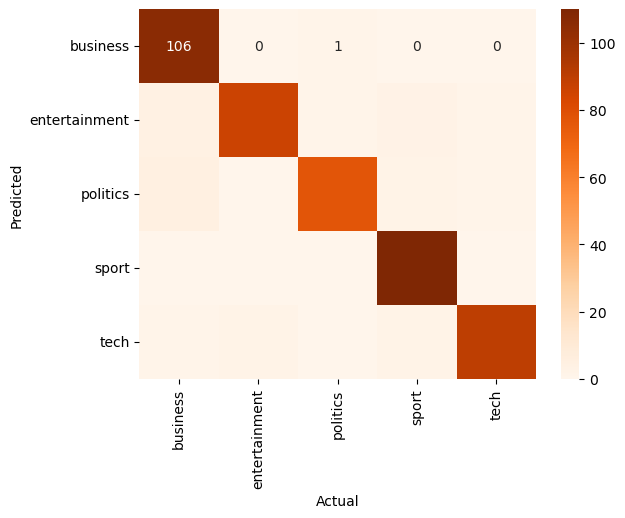

In [41]:
plot_matrix(y_test, y_predicted)

In [42]:
rfc2 = RandomForestClassifier(max_depth=20, random_state=25)

rfc2.fit(X_train, y_train)
y_predicted = rfc2.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.9613821138211383


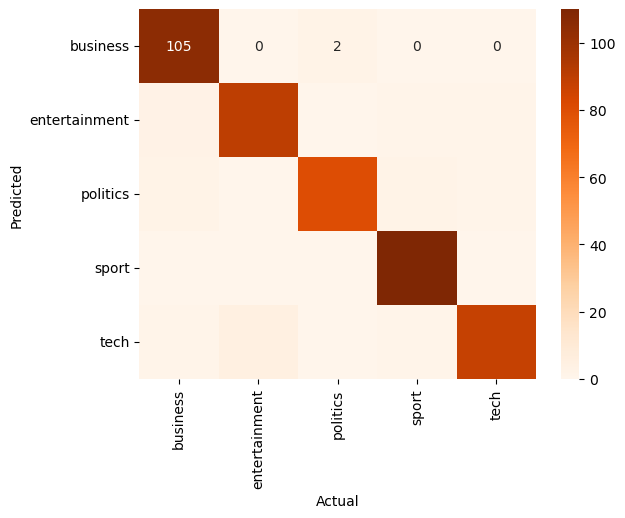

In [43]:
plot_matrix(y_test, y_predicted)

In [44]:
rfc3 = RandomForestClassifier(max_depth=50, random_state=38)

rfc3.fit(X_train, y_train)
y_predicted = rfc3.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.967479674796748


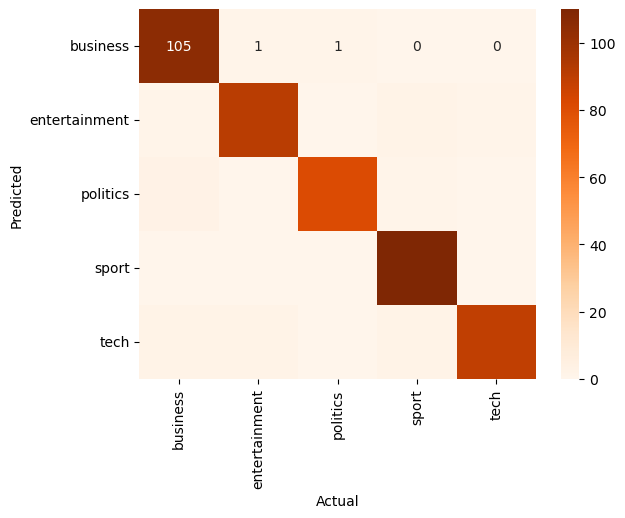

In [45]:
plot_matrix(y_test, y_predicted)

In [46]:
rfc4 = RandomForestClassifier(max_depth=100, random_state=80)

rfc4.fit(X_train, y_train)
y_predicted = rfc4.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.9654471544715447


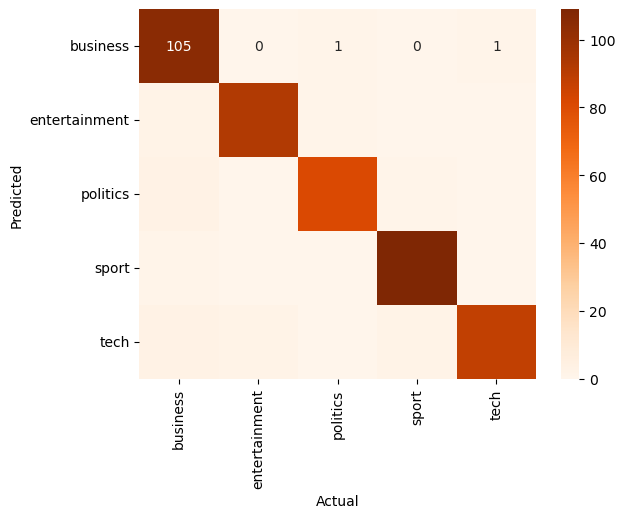

In [47]:
plot_matrix(y_test, y_predicted)

In [48]:
rfc5 = RandomForestClassifier(max_depth=200, random_state=150)

rfc5.fit(X_train, y_train)
y_predicted = rfc5.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.9654471544715447


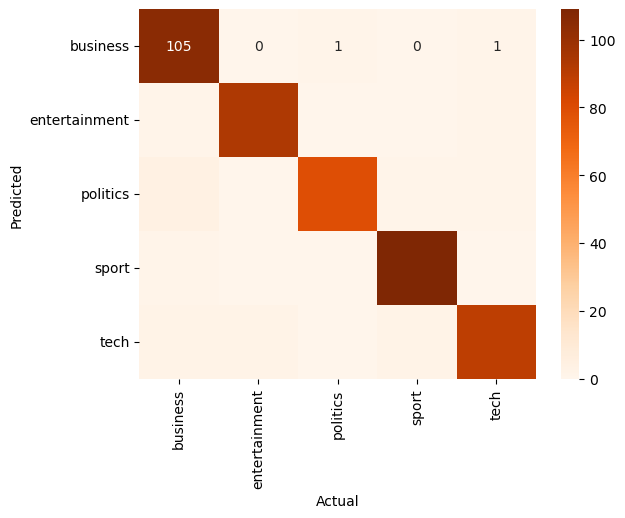

In [49]:
plot_matrix(y_test, y_predicted)

In [50]:
rfc6 = RandomForestClassifier(max_depth=300, random_state=280)

rfc6.fit(X_train, y_train)
y_predicted = rfc6.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.967479674796748


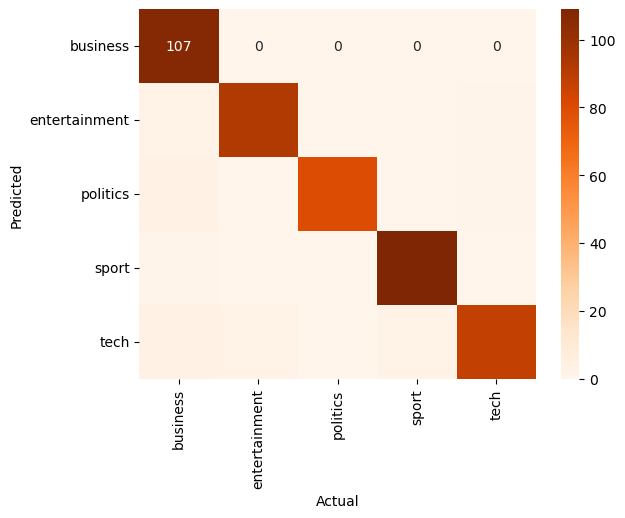

In [51]:
plot_matrix(y_test, y_predicted)

In [52]:
rfc7 = RandomForestClassifier(max_depth=400, random_state=320)

rfc7.fit(X_train, y_train)
y_predicted = rfc7.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.967479674796748


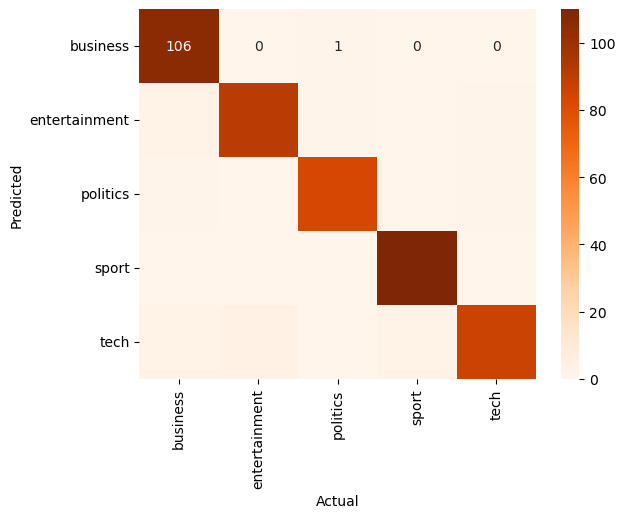

In [53]:
plot_matrix(y_test, y_predicted)

In [54]:
rfc8 = RandomForestClassifier(max_depth=800, random_state=500)

rfc8.fit(X_train, y_train)
y_predicted = rfc8.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.959349593495935


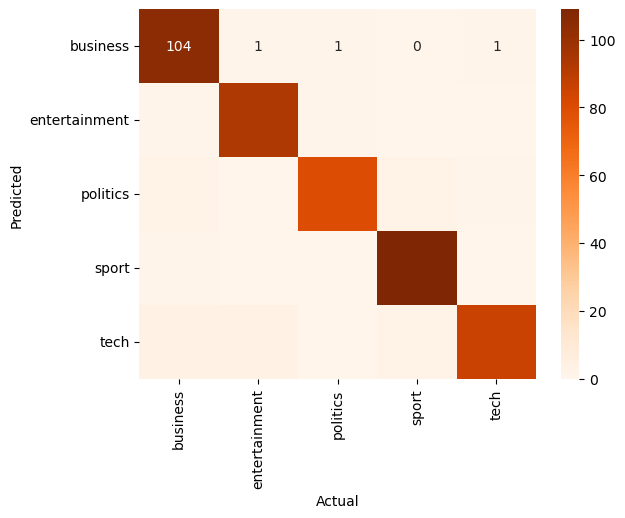

In [55]:
plot_matrix(y_test, y_predicted)

In [56]:
rfc9 = RandomForestClassifier(max_depth=500, random_state=480)

rfc9.fit(X_train, y_train)
y_predicted = rfc9.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.9634146341463414


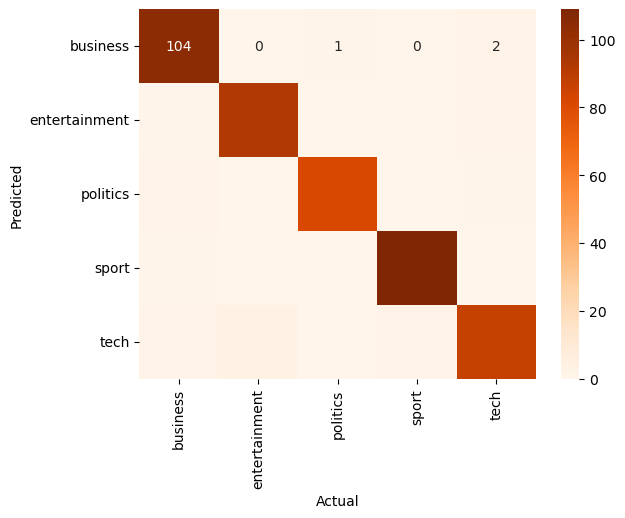

In [57]:
plot_matrix(y_test, y_predicted)

In [58]:
np.average(cross_val_score(rfc8, X, y, cv=10))

0.9577181208053691

# 4. K Nearest Neighbors

Accuracy : 0.9004065040650406
               precision    recall  f1-score   support

     business       0.84      0.93      0.88       107
entertainment       0.90      0.92      0.91        95
     politics       0.82      0.93      0.87        85
        sport       1.00      0.90      0.95       110
         tech       0.96      0.83      0.89        95

     accuracy                           0.90       492
    macro avg       0.90      0.90      0.90       492
 weighted avg       0.91      0.90      0.90       492



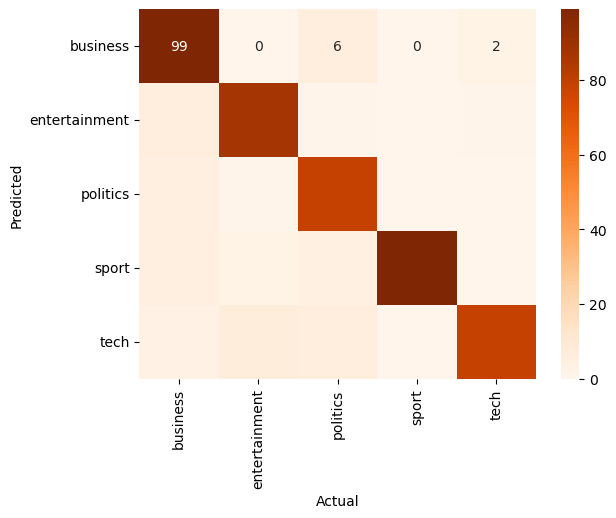

In [59]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

print("Accuracy :",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_matrix(y_test, y_pred)

# 5. Naive Bayes


1. Gaussian Naive Bayes
2. Multinomial Naive Bayes
3. Complement Naive Bayes
4. Bernoulli Naive Bayes
5. Categorical Naive Bayes
6. Out-of-core naive Bayes model fitting


### 1. Gaussian Naive Bayes

Accuracy : 0.9349593495934959
               precision    recall  f1-score   support

     business       0.94      0.88      0.91       107
entertainment       0.93      0.98      0.95        95
     politics       0.92      0.92      0.92        85
        sport       0.99      0.97      0.98       110
         tech       0.89      0.93      0.91        95

     accuracy                           0.93       492
    macro avg       0.93      0.93      0.93       492
 weighted avg       0.94      0.93      0.93       492



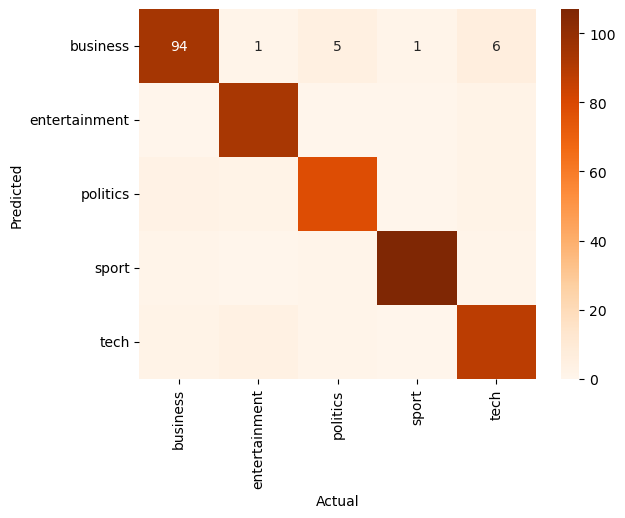

In [60]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_predicted = gnb.predict(X_test.toarray())
print("Accuracy :",accuracy_score(y_test, y_predicted))

print(classification_report(y_test, y_predicted))

plot_matrix(y_test, y_predicted)

### 2. Multinomial Naive Bayes


Accuracy : 0.9715447154471545
               precision    recall  f1-score   support

     business       0.95      0.98      0.97       107
entertainment       0.99      0.97      0.98        95
     politics       0.94      0.96      0.95        85
        sport       0.97      0.99      0.98       110
         tech       1.00      0.95      0.97        95

     accuracy                           0.97       492
    macro avg       0.97      0.97      0.97       492
 weighted avg       0.97      0.97      0.97       492



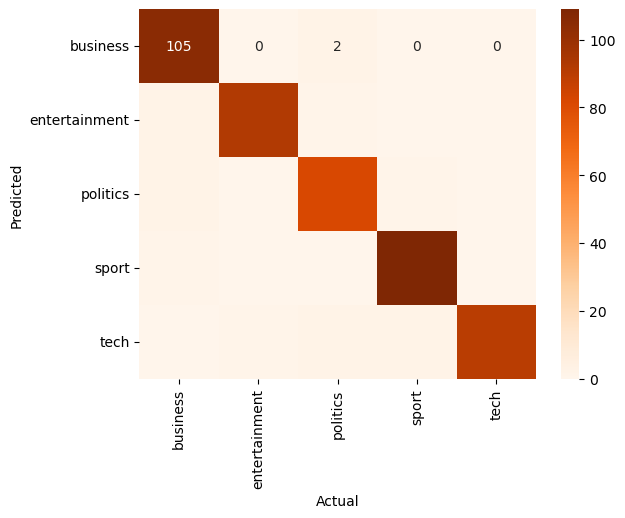

In [61]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train.toarray(), y_train)
y_predicted = mnb.predict(X_test.toarray())
print("Accuracy :",accuracy_score(y_test, y_predicted))

print(classification_report(y_test, y_predicted))
plot_matrix(y_test, y_predicted)

### 3. Complement Naive Bayes

Accuracy : 0.9776422764227642
               precision    recall  f1-score   support

     business       0.98      0.96      0.97       107
entertainment       0.99      0.98      0.98        95
     politics       0.94      0.99      0.97        85
        sport       0.99      0.99      0.99       110
         tech       0.98      0.97      0.97        95

     accuracy                           0.98       492
    macro avg       0.98      0.98      0.98       492
 weighted avg       0.98      0.98      0.98       492



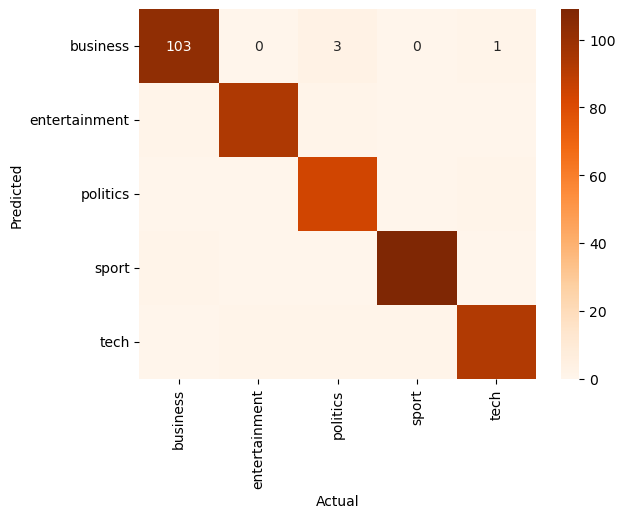

In [62]:
from sklearn.naive_bayes import ComplementNB

cnb = ComplementNB()
cnb.fit(X_train, y_train)
y_predicted = cnb.predict(X_test.toarray())
print("Accuracy :",accuracy_score(y_test, y_predicted))

print(classification_report(y_test, y_predicted))

plot_matrix(y_test, y_predicted)

### 4. Bernoulli Naive Bayes

Accuracy : 0.9288617886178862
               precision    recall  f1-score   support

     business       0.79      0.99      0.88       107
entertainment       0.98      0.96      0.97        95
     politics       0.97      0.85      0.91        85
        sport       0.98      0.99      0.99       110
         tech       0.99      0.83      0.90        95

     accuracy                           0.93       492
    macro avg       0.94      0.92      0.93       492
 weighted avg       0.94      0.93      0.93       492



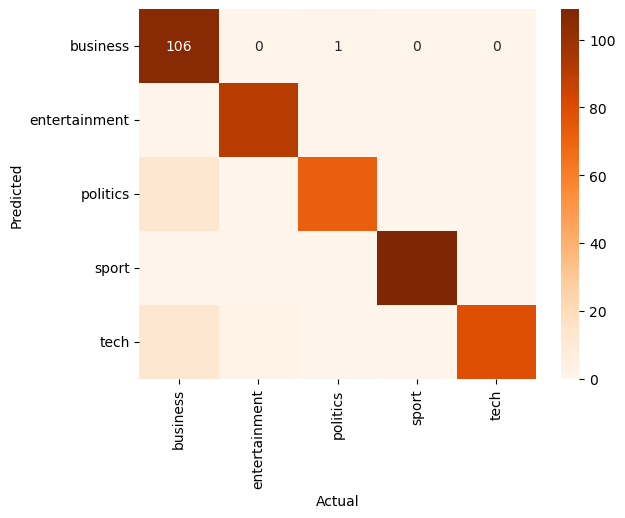

In [63]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_predicted = bnb.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

print(classification_report(y_test, y_predicted))

plot_matrix(y_test, y_predicted)

## Save Model

In [64]:
import pickle as pk

In [65]:
with open("cnb.pk", "wb") as f:
    pk.dump(cnb, f)

In [66]:
with open("cnb.pk", "rb") as f:
    Y = pk.load(f)


In [67]:
with open("TfIdf_Vectorizer.pk", "wb") as f:
    pk.dump(TfIdf_Vectorizer, f)

In [68]:
with open("TfIdf_Vectorizer.pk", "rb") as f:
    pk.load(f)

# Test Some Articles

In [69]:
business = """
LONDON — Tate & Lyle has agreed to sell its remaining 49.7% interest in Primary Products Investments LLC (Primient) for ₤279 million ($350 million) in cash to KPS Capital Partners, LP.
“With this sale, the transformation of Tate & Lyle into a fully focused specialty food and beverage solutions business is complete,” said Nick Hampton, chief executive, when the transaction was announced May 23. 
“We are now well-positioned to capture the significant growth opportunities ahead as we look to provide our customers with the solutions they need to meet growing consumer demand for healthier, tastier and more sustainable food and drink.”
"""

In [71]:
detect_catagory(cnb, business)

'business'

In [ ]:
politics = """
In 2019, a retired navy man called Commodore Lokesh Batra approached the journalist Nitin Sethi with a trove of documents obtained through several 
Right to Information (RTI) requests that revealed large-scale wrongdoing in a new government scheme for political funding.
Simply put, the “electoral bonds” scheme, introduced in 2018, allowed individuals and corporate groups to donate anonymously to political parties. 
The Bharatiya Janata Party (BJP) government presented it as a key reform that would eliminate cash and root out corruption.
"""

In [ ]:
detect_catagory(cnb, politics)

'politics'

In [ ]:
sport = """
The U.S. men’s hockey team lost in the quarterfinals of the world championship for its earliest exit from the tournament in five years.
Host Czechia blanked the U.S. 1-0 behind a second-period goal from Boston Bruins forward Pavel Zacha and 36 saves from Anaheim Ducks goalie Lukas Dostal.
The Americans lost in the semifinals of worlds the previous three years.
Czechia advanced to play Sweden in Saturday’s semifinals. The other semi pits Canada against Switzerland. The gold- and bronze-medal games are Sunday in Prague.
The U.S.’ last silver at worlds came in 1950. Its lone gold at a standalone worlds came in 1933.
"""

In [ ]:
detect_catagory(cnb, sport)

'sport'